In [1]:
import pandas as pd
import wget
import matplotlib.pyplot as plt
from datetime import date, datetime


In [2]:
# filename = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
# wget.download(filename)

df_US = pd.read_csv("time_series_covid19_confirmed_US.csv")

df_US.columns = list(df_US.columns[:11]) + [datetime.strptime(d, "%m/%d/%y").date().strftime("%Y-%m-%d") for d in df_US.columns[11:]]


In [3]:
df_US.head(10)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23
0,16.0,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,0,0,0,0,0,0,0,0,0,0
1,316.0,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,133,135,135,136,136,136,136,136,136,139
2,580.0,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,11,13,13,13,14,14,14,14,14,14
3,630.0,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,...,923,974,1043,1068,1118,1213,1252,1298,1252,1416
4,850.0,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,...,51,51,51,51,53,53,53,53,54,54
5,84001001.0,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,23,24,26,26,25,26,28,30,32,33
6,84001003.0,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,87,91,101,103,109,112,117,123,132,143
7,84001005.0,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,11,12,14,15,18,20,22,28,29,30
8,84001007.0,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,17,18,22,24,26,28,32,32,34,33
9,84001009.0,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,16,17,18,20,20,21,22,26,29,31


In [4]:
us_melt_df = pd.melt(df_US, 
                     id_vars=["UID", "iso2", "iso3", "code3", "FIPS", "Admin2", "Province_State", "Country_Region", "Lat", "Long_", "Combined_Key"], 
                     var_name="Date", 
                     value_name="Confirmed")
us_melt_df.head(100)


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed
0,16.0,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",2020-01-22,0
1,316.0,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",2020-01-22,0
2,580.0,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",2020-01-22,0
3,630.0,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,"Puerto Rico, US",2020-01-22,0
4,850.0,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,"Virgin Islands, US",2020-01-22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,84002230.0,US,USA,840,2230.0,Skagway,Alaska,US,59.561500,-135.333775,"Skagway, Alaska, US",2020-01-22,0
96,84002240.0,US,USA,840,2240.0,Southeast Fairbanks,Alaska,US,63.876921,-143.212764,"Southeast Fairbanks, Alaska, US",2020-01-22,0
97,84002261.0,US,USA,840,2261.0,Valdez-Cordova,Alaska,US,61.475028,-144.712680,"Valdez-Cordova, Alaska, US",2020-01-22,0
98,84002275.0,US,USA,840,2275.0,Wrangell,Alaska,US,56.320200,-132.058373,"Wrangell, Alaska, US",2020-01-22,0


<BarContainer object of 58 artists>

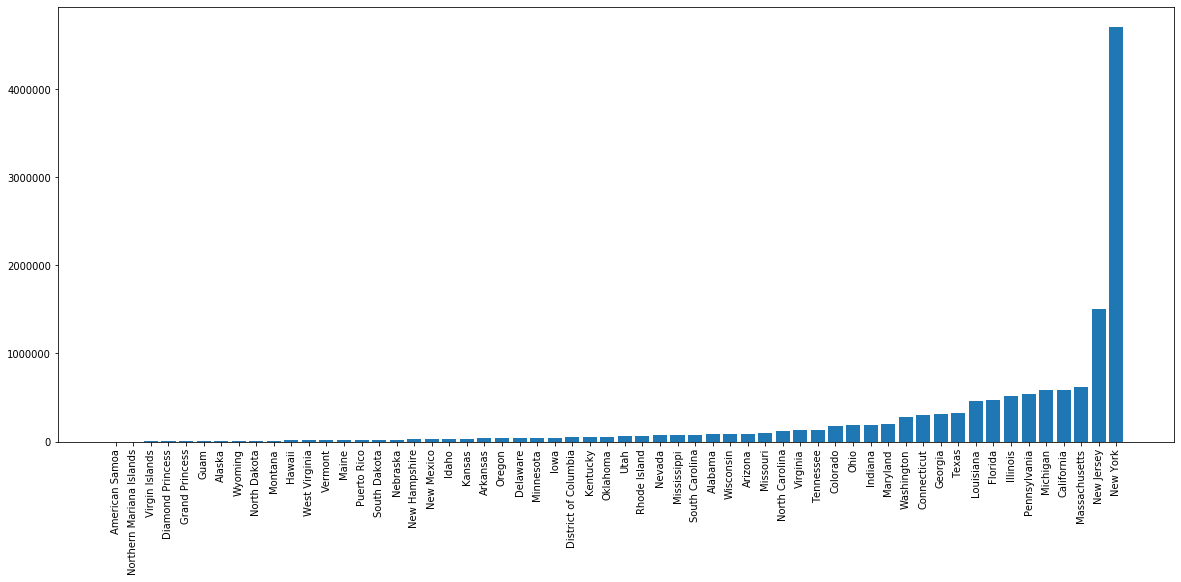

In [5]:
dates = list(us_melt_df['Date'].unique())
dates_ticks = [dates[i] if i % 7 == 0 else '' for i in range(len(dates))]

df_state = us_melt_df.groupby(['Province_State'])['Confirmed'].sum().reset_index()
df_state = df_state.sort_values(by=['Confirmed'])


plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
plt.bar(x = df_state['Province_State'], height = df_state['Confirmed'])


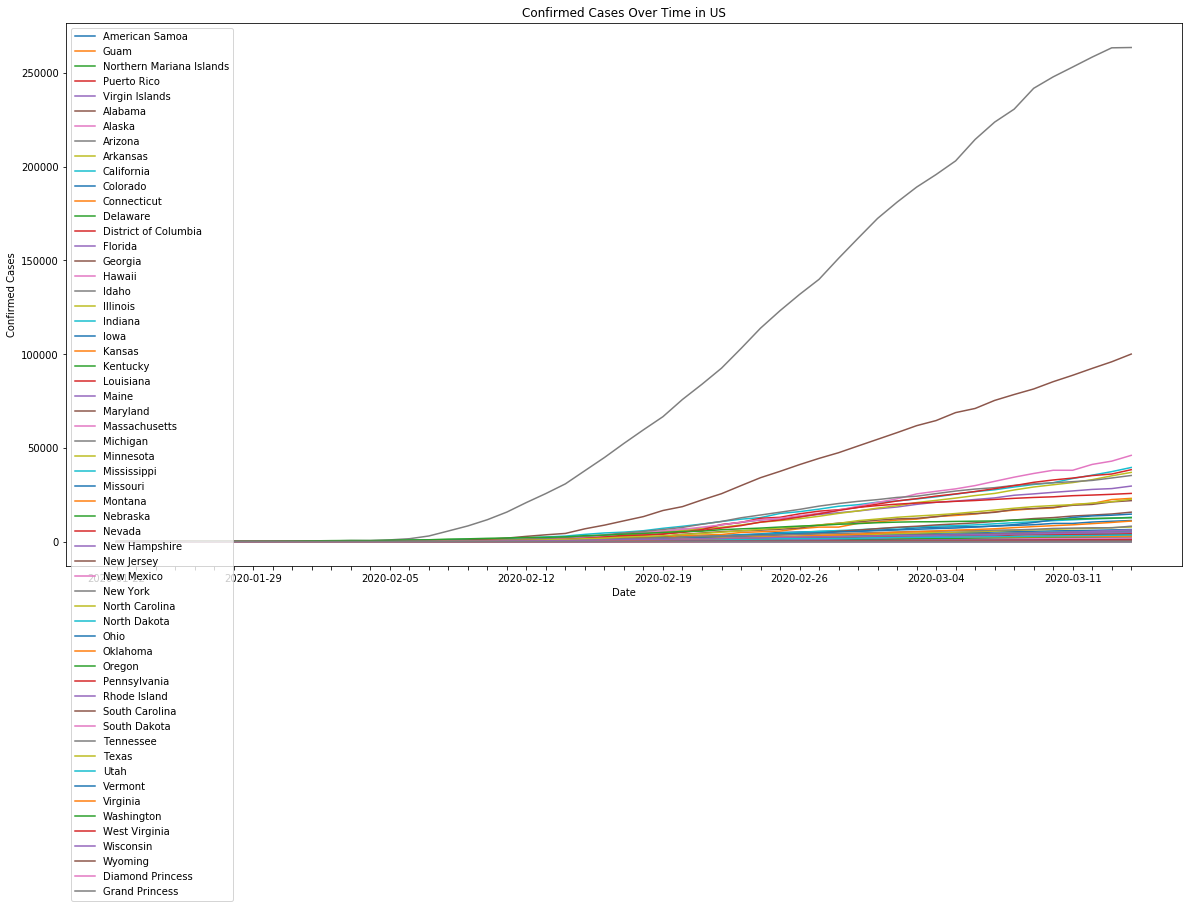

In [6]:
us_melt_df = us_melt_df.query('Date > "2020-03-01"')
dates = list(us_melt_df['Date'].unique())


f, ax = plt.subplots(1,1, figsize=(20,10))
states = list(us_melt_df['Province_State'].unique())

df_state = us_melt_df.groupby(['Province_State', 'Date'])['Confirmed'].sum()

for state in states:
    ax.plot(dates, 
            list(df_state[state]), 
            label=state)
    
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed Cases')
ax.set_xticklabels(dates_ticks)
ax.legend(loc='upper left')
ax.set_title('Confirmed Cases Over Time in US')

plt.savefig("us_confirmed.jpeg", dpi=200)


Georgia
https://dph.georgia.gov/covid-19-daily-status-report


In [7]:
df_GA = pd.read_csv("COVID-19_Deaths_in_Georgia.csv")
df_GA = df_GA.drop(columns=['Underlying'])

df_GA

,Age,Gender,County
0,NaN,MALE,APPLING
1,82.0,MALE,APPLING
2,71.0,MALE,APPLING
3,69.0,MALE,APPLING
4,70.0,MALE,BACON
...,...,...,...
891,82.0,MALE,NON-GEORGIA RESIDENT
892,68.0,MALE,NON-GEORGIA RESIDENT
893,71.0,MALE,NON-GEORGIA RESIDENT
894,53.0,MALE,NON-GEORGIA RESIDENT


In [8]:
df_GA.groupby(["Age", "Gender", "County"]).size()

Age    Gender  County  
22.0   FEMALE  MUSCOGEE    1
27.0   FEMALE  LEE         1
28.0   MALE    SUMTER      1
29.0   FEMALE  HOUSTON     1
               PEACH       1
                          ..
99.0   FEMALE  DEKALB      1
               RANDOLPH    1
100.0  FEMALE  FULTON      1
               GREENE      1
101.0  FEMALE  FULTON      1
Length: 741, dtype: int64

In [9]:
(df_GA.groupby(["Age", "Gender", "County"]).size() == 1).sum()

630

Out of 895 records, there are 630 people could be unqiuely identified by quasi-identifiers "Age", "Gender", and "County".


In [10]:
k_anonymity = min(df_GA.groupby(["Age", "Gender", "County"]).size())

print("k_anonymity is " + str(k_anonymity))

k_anonymity is 1


In [11]:
for i, row in df_GA.iterrows():
    age_range = "nan"
    if row['Age'] < 10:
        age_range = "0-10"
    elif row['Age'] < 20:
        age_range = "10-20"
    elif row['Age'] < 30:
        age_range = "20-30"
    elif row['Age'] < 40:
        age_range = "30-40"
    elif row['Age'] < 50:
        age_range = "40-50"
    elif row['Age'] < 60:
        age_range = "50-60"
    elif row['Age'] < 70:
        age_range = "60-70"
    elif row['Age'] < 80:
        age_range = "70-80"
    elif row['Age'] < 90:
        age_range = "80-90"
    elif row['Age'] < 100:
        age_range = "90-100"
    elif row['Age'] < 110:
        age_range = "100-110"
    elif row['Age'] < 120:
        age_range = "110-120"
    
    df_GA.set_value(i,'Age Range', age_range)

/Users/yaoyanglin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [12]:
GA_map = {"BANKS": "North Georgia", "BARROW": "North Georgia", "BARTOW": "North Georgia", "CATOOSA": "North Georgia",
          "CHATTOOGA": "North Georgia", "CHEROKEE": "North Georgia", "CLARKE": "North Georgia", "DADE": "North Georgia",
          "DAWSON": "North Georgia", "ELBERT": "North Georgia", "FANNIN": "North Georgia", "FLOYD": "North Georgia", 
          "FORSYTH": "North Georgia", "FRANKLIN": "North Georgia", "GILMER": "North Georgia", "GORDON": "North Georgia",
          "HABERSHAM": "North Georgia", "HALL": "North Georgia", "HART": "North Georgia", "JACKSON": "North Georgia", 
          "LUMPKIN": "North Georgia", "MADISON": "North Georgia", "MORGAN": "North Georgia", "MURRAY": "North Georgia", 
          "NEWTON": "North Georgia", "OCONEE": "North Georgia", "OGLETHORPE": "North Georgia", "PICKENS": "North Georgia", 
          "POLK": "North Georgia", "RABUN": "North Georgia", "STEPHENS": "North Georgia", "TOWNS": "North Georgia", 
          "UNION": "North Georgia", "WALKER": "North Georgia", "WALTON": "North Georgia", "WHITE": "North Georgia", "WHITFIELD": "North Georgia",
         "CLAYTON": "Metro Atlanta", "COBB": "Metro Atlanta", "DEKALB": "Metro Atlanta", "FULTON": "Metro Atlanta",
          "GWINNETT": "Metro Atlanta", "HENRY": "Metro Atlanta", "ROCKDALE": "Metro Atlanta",
         "CARROLL": "West Georgia", "CLAY": "West Georgia", "COWETA": "West Georgia", "DOUGLAS": "West Georgia", 
          "FAYETTE": "West Georgia", "HARALSON": "West Georgia", "HARRIS": "West Georgia", "HEARD": "West Georgia",
          "MACON": "West Georgia", "MARION": "West Georgia", "MERIWETHER": "West Georgia", "MUSCOGEE": "West Georgia",
          "PAULDING": "West Georgia", "PIKE": "West Georgia", "SCHLEY": "West Georgia", "SPALDING": "West Georgia",
          "STEWART": "West Georgia", "SUMTER": "West Georgia", "TALBOT": "West Georgia", "TAYLOR": "West Georgia",
          "TROUP": "West Georgia", "UPSON": "West Georgia", "WEBSTER": "West Georgia",
          "BALDWIN": "Middle Georgia", "BIBB": "Middle Georgia", "BLECKLEY": "Middle Georgia", "BUTTS": "Middle Georgia",
          "CRAWFORD": "Middle Georgia", "DODGE": "Middle Georgia", "DOOLY": "Middle Georgia", "HOUSTON": "Middle Georgia",
          "JASPER": "Middle Georgia", "JONES": "Middle Georgia", "LAMAR": "Middle Georgia", "LAURENS": "Middle Georgia",
          "MONROE": "Middle Georgia", "PEACH": "Middle Georgia", "PULASKI": "Middle Georgia", "PUTNAM": "Middle Georgia",
          "TWIGGS": "Middle Georgia", "WILKINSON": "Middle Georgia",
          "BURKE":"East Georgia", "COLUMBIA":"East Georgia", "EMANUEL":"East Georgia", "GLASCOCK":"East Georgia", "GREENE":"East Georgia",
          "HANCOCK":"East Georgia", "JEFFERSON":"East Georgia", "JENKINS":"East Georgia", "JOHNSON":"East Georgia", "LINCOLN":"East Georgia",
          "MCDUFFIE":"East Georgia", "RICHMOND":"East Georgia", "TALIAFERRO":"East Georgia", "WARREN":"East Georgia", "WASHINGTON":"East Georgia", "WILKES":"East Georgia",
          "APPLING": "South Georgia", "ATKINSON": "South Georgia", "BACON": "South Georgia", "BAKER": "South Georgia", "BEN HILL": "South Georgia",
          "BERRIEN": "South Georgia", "BRANTLEY": "South Georgia", "BROOKS": "South Georgia", "BRYAN": "South Georgia", "BULLOCH": "South Georgia",
          "CALHOUN": "South Georgia", "CAMDEN": "South Georgia", "CANDLER": "South Georgia", "CHARLTON": "South Georgia", "CHATHAM": "South Georgia",
          "CLAY": "South Georgia", "CLINCH": "South Georgia", "COFFEE": "South Georgia", "COLQUITT": "South Georgia", "COOK": "South Georgia", 
          "CRISP": "South Georgia", "DECATUR": "South Georgia", "DOUGHERTY": "South Georgia", "DOUGHTRY": "South Georgia", "EARLY": "South Georgia",
          "ECHOLS": "South Georgia", "EFFINGHAM": "South Georgia", "EVANS": "South Georgia", "GLYNN": "South Georgia", "GRADY": "South Georgia", 
          "IRWIN": "South Georgia", "JEFF DAVIS": "South Georgia", "LANIER": "South Georgia", "LEE": "South Georgia", "LIBERTY": "South Georgia",
          "LONG": "South Georgia", "LOWNDES": "South Georgia", "MCINTOSH": "South Georgia", "MILLER": "South Georgia", "MITCHELL": "South Georgia",
          "MONTGOMERY": "South Georgia", "PIERCE": "South Georgia", "QUITMAN": "South Georgia", "RANDOLPH": "South Georgia", "SCREVEN": "South Georgia",
          "SEMINOLE": "South Georgia", "TATTNALL": "South Georgia", "TELFAIR": "South Georgia", "TERRELL": "South Georgia", "THOMAS": "South Georgia", 
          "TIFT": "South Georgia", "TOOMBS": "South Georgia", "TREUTLEN": "South Georgia", "TURNER": "South Georgia", "WARE": "South Georgia",
          "WAYNE": "South Georgia", "WHEELER": "South Georgia", "WILCOX": "South Georgia", "WORTH": "South Georgia",
          "NON-GEORGIA RESIDENT": 'NON-GEORGIA RESIDENT',
}




In [13]:
for i, row in df_GA.iterrows():    
    df_GA.set_value(i,'Region', GA_map[row['County']])

/Users/yaoyanglin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [14]:
df_GA.drop(columns=['Age', 'County'])

df_GA = df_GA.reindex(columns=['Age Range', 'Gender', 'Region'])
df_GA

,Age Range,Gender,Region
0,nan,MALE,South Georgia
1,80-90,MALE,South Georgia
2,70-80,MALE,South Georgia
3,60-70,MALE,South Georgia
4,70-80,MALE,South Georgia
...,...,...,...
891,80-90,MALE,NON-GEORGIA RESIDENT
892,60-70,MALE,NON-GEORGIA RESIDENT
893,70-80,MALE,NON-GEORGIA RESIDENT
894,50-60,MALE,NON-GEORGIA RESIDENT


In [15]:
(df_GA.groupby(["Age Range", "Gender", "Region"]).size() == 1).sum()


24